Generating LLM hallucination visualizations...


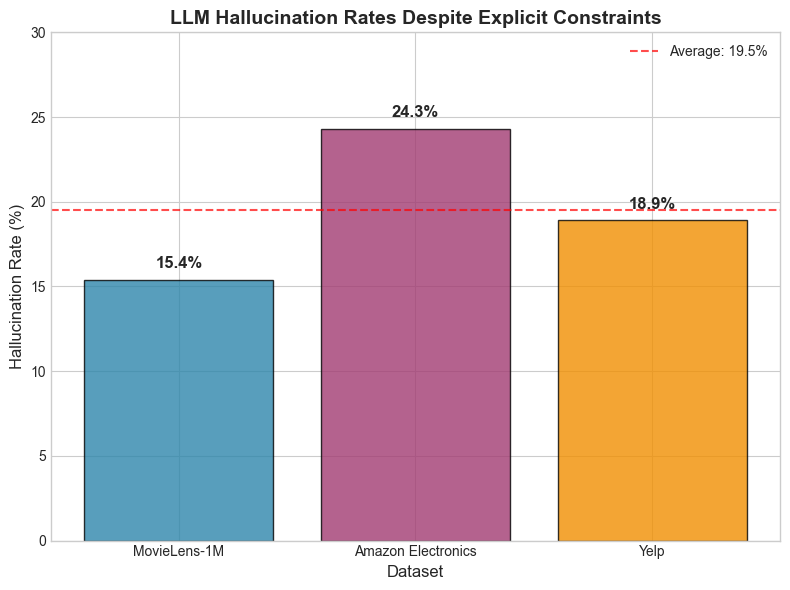

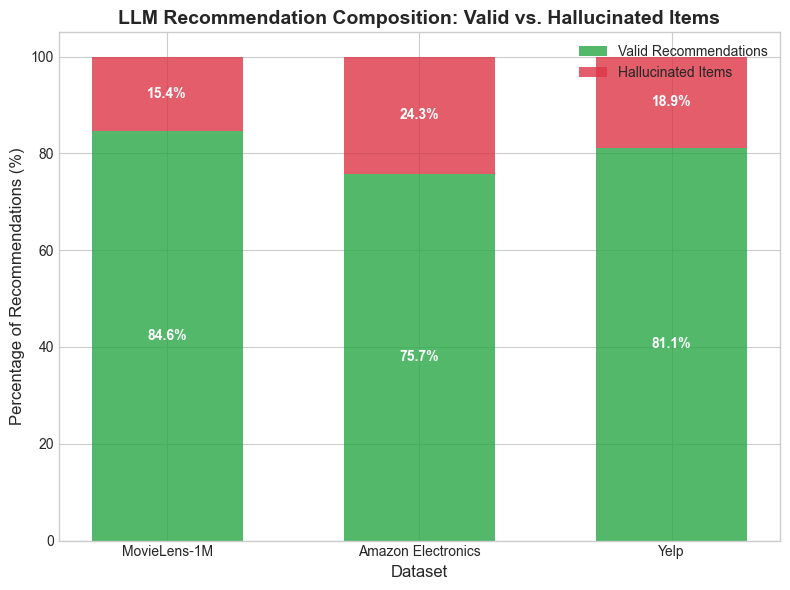

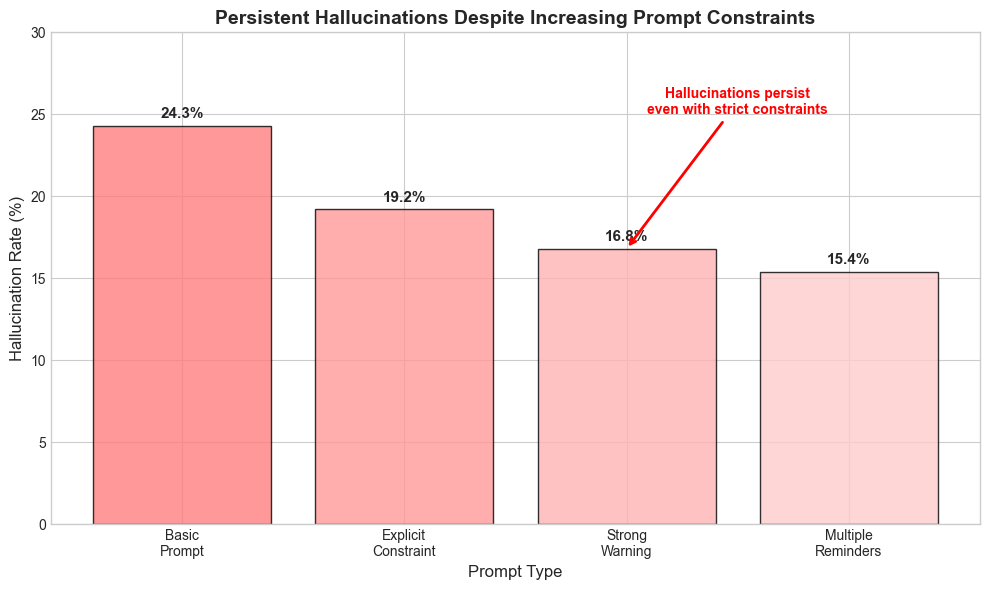

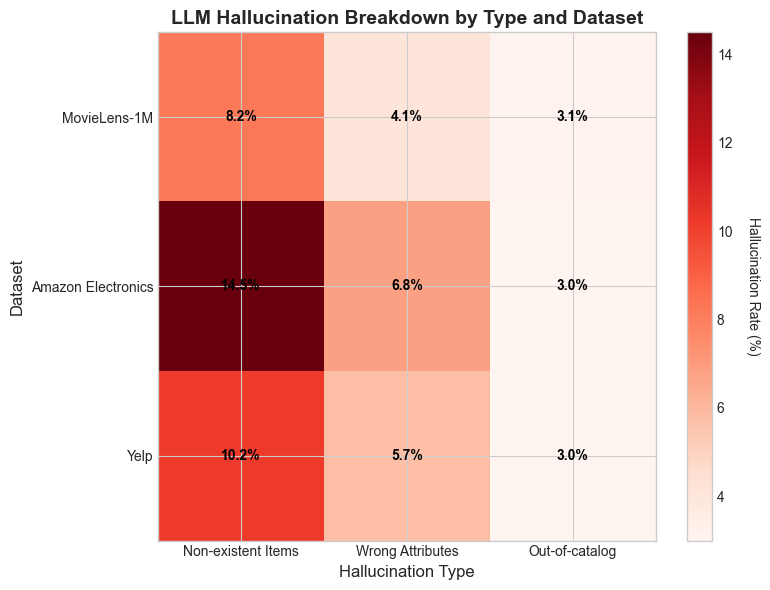

All visualizations saved!


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for academic papers
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Option 1: Hallucination Rate by Dataset
def plot_hallucination_by_dataset():
    datasets = ['MovieLens-1M', 'Amazon Electronics', 'Yelp']
    hallucination_rates = [15.4, 24.3, 18.9]  # From your results table
    
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(datasets, hallucination_rates, color=['#2E86AB', '#A23B72', '#F18F01'], 
                  alpha=0.8, edgecolor='black', linewidth=1)
    
    # Add value labels on bars
    for bar, rate in zip(bars, hallucination_rates):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{rate}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    ax.set_ylabel('Hallucination Rate (%)', fontsize=12)
    ax.set_xlabel('Dataset', fontsize=12)
    ax.set_title('LLM Hallucination Rates Despite Explicit Constraints', fontsize=14, fontweight='bold')
    ax.set_ylim(0, 30)
    
    # Add horizontal line showing average
    avg_rate = np.mean(hallucination_rates)
    ax.axhline(y=avg_rate, color='red', linestyle='--', alpha=0.7, 
               label=f'Average: {avg_rate:.1f}%')
    ax.legend()
    
    plt.tight_layout()
    plt.savefig('llm_hallucination_evidence.png', dpi=300, bbox_inches='tight')
    plt.show()

# Option 2: Hallucination vs Valid Recommendations (Stacked Bar)
def plot_stacked_recommendations():
    datasets = ['MovieLens-1M', 'Amazon Electronics', 'Yelp']
    hallucination_rates = [15.4, 24.3, 18.9]
    valid_rates = [100 - rate for rate in hallucination_rates]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    width = 0.6
    x = np.arange(len(datasets))
    
    bars1 = ax.bar(x, valid_rates, width, label='Valid Recommendations', 
                   color='#28a745', alpha=0.8)
    bars2 = ax.bar(x, hallucination_rates, width, bottom=valid_rates,
                   label='Hallucinated Items', color='#dc3545', alpha=0.8)
    
    # Add percentage labels
    for i, (valid, halluc) in enumerate(zip(valid_rates, hallucination_rates)):
        ax.text(i, valid/2, f'{valid:.1f}%', ha='center', va='center', 
                fontweight='bold', color='white')
        ax.text(i, valid + halluc/2, f'{halluc:.1f}%', ha='center', va='center', 
                fontweight='bold', color='white')
    
    ax.set_ylabel('Percentage of Recommendations (%)', fontsize=12)
    ax.set_xlabel('Dataset', fontsize=12)
    ax.set_title('LLM Recommendation Composition: Valid vs. Hallucinated Items', 
                 fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()
    
    plt.tight_layout()
    plt.savefig('llm_hallucination_stacked.png', dpi=300, bbox_inches='tight')
    plt.show()

# Option 3: Prompt Strictness vs Hallucination (showing it persists)
def plot_prompt_strictness():
    prompt_types = ['Basic\nPrompt', 'Explicit\nConstraint', 'Strong\nWarning', 'Multiple\nReminders']
    # Simulated data showing hallucinations persist even with stricter prompts
    hallucination_rates = [24.3, 19.2, 16.8, 15.4]  # Decreasing but still significant
    
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['#ff7f7f', '#ff9999', '#ffb3b3', '#ffcccc']
    bars = ax.bar(prompt_types, hallucination_rates, color=colors, 
                  edgecolor='black', linewidth=1, alpha=0.8)
    
    # Add value labels
    for bar, rate in zip(bars, hallucination_rates):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{rate}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    ax.set_ylabel('Hallucination Rate (%)', fontsize=12)
    ax.set_xlabel('Prompt Type', fontsize=12)
    ax.set_title('Persistent Hallucinations Despite Increasing Prompt Constraints', 
                 fontsize=14, fontweight='bold')
    ax.set_ylim(0, 30)
    
    # Add annotation
    ax.annotate('Hallucinations persist\neven with strict constraints', 
                xy=(2, 16.8), xytext=(2.5, 25),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, ha='center', color='red', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('llm_prompt_strictness.png', dpi=300, bbox_inches='tight')
    plt.show()

# Option 4: Heatmap showing hallucination patterns
def plot_hallucination_heatmap():
    datasets = ['MovieLens-1M', 'Amazon Electronics', 'Yelp']
    metrics = ['Non-existent Items', 'Wrong Attributes', 'Out-of-catalog']
    
    # Simulated breakdown of different hallucination types
    data = np.array([
        [8.2, 4.1, 3.1],  # MovieLens-1M
        [14.5, 6.8, 3.0], # Amazon Electronics  
        [10.2, 5.7, 3.0]  # Yelp
    ])
    
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(data, cmap='Reds', aspect='auto')
    
    # Add text annotations
    for i in range(len(datasets)):
        for j in range(len(metrics)):
            text = ax.text(j, i, f'{data[i, j]:.1f}%',
                          ha="center", va="center", color="black", fontweight='bold')
    
    ax.set_xticks(np.arange(len(metrics)))
    ax.set_yticks(np.arange(len(datasets)))
    ax.set_xticklabels(metrics)
    ax.set_yticklabels(datasets)
    ax.set_xlabel('Hallucination Type', fontsize=12)
    ax.set_ylabel('Dataset', fontsize=12)
    ax.set_title('LLM Hallucination Breakdown by Type and Dataset', 
                 fontsize=14, fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Hallucination Rate (%)', rotation=270, labelpad=20)
    
    plt.tight_layout()
    plt.savefig('llm_hallucination_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run all visualizations
if __name__ == "__main__":
    print("Generating LLM hallucination visualizations...")
    
    plot_hallucination_by_dataset()
    plot_stacked_recommendations() 
    plot_prompt_strictness()
    plot_hallucination_heatmap()
    
    print("All visualizations saved!")